# Image retrieval using deep features

In [1]:
import turicreate

In [2]:
turicreate.visualization.set_target('auto')

# Load some CIFAR-10 images

In [3]:
image_data = turicreate.SFrame('./image_train_data/')

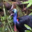

In [5]:
image_data[0]['image']

In [6]:
image_data['image'].explore()

/Users/dpresich/venv/lib/python3.8/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


ValueError: Value must be a nonnegative integer or None

# Compute deep features from our images

In [ ]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [7]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Create a nearest neighbors model to retrieve images from deep features

In [8]:
knn_model = turicreate.nearest_neighbors.create(image_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [9]:
cat = image_data[18:19]

In [10]:
cat['image'].explore()

ValueError: Value must be a nonnegative integer or None

In [11]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 16.672ms     |

| Done         |         | 100         | 124.798ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [12]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [13]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.368ms      |

| Done         |         | 100         | 115.146ms    |

+--------------+---------+-------------+--------------+

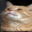

In [18]:
cat_neighbors['image'][0]

# Find images similar to a car

In [15]:
car = image_data[8:9]

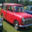

In [17]:
car['image'][0]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.291ms      |

| Done         |         | 100         | 72.816ms     |

+--------------+---------+-------------+--------------+

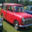

In [21]:
get_images_from_ids(knn_model.query(car))['image'][0]

# Create a lambda function to find and show nearest neighbors to an image

In [24]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'][0]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 10.363ms     |

| Done         |         | 100         | 100.657ms    |

+--------------+---------+-------------+--------------+

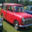

In [25]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.498ms      |

| Done         |         | 100         | 131.931ms    |

+--------------+---------+-------------+--------------+

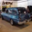

In [26]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 9.835ms      |

| Done         |         | 100         | 83.176ms     |

+--------------+---------+-------------+--------------+

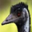

In [27]:
show_neighbors(500)

# Programming assignment

## Compute summary statistics of the data

In [28]:
# sketch = turicreate.Sketch(image_data['label'])
sketch = image_data['label'].summary()
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


## Create category-specific image retrieval models

In [29]:
cat_training_data = image_data[image_data['label'] == 'cat']
dog_training_data = image_data[image_data['label'] == 'dog']
automobile_training_data = image_data[image_data['label'] == 'automobile']
bird_training_data = image_data[image_data['label'] == 'bird']

In [30]:
cat_model = turicreate.nearest_neighbors.create(cat_training_data, features = ['deep_features'], label = 'id')
dog_model = turicreate.nearest_neighbors.create(dog_training_data, features=['deep_features'], label='id')
automobile_model = turicreate.nearest_neighbors.create(automobile_training_data, features=['deep_features'], label='id')
bird_model = turicreate.nearest_neighbors.create(bird_training_data, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [31]:
image_test = turicreate.SFrame('./image_test_data')

In [32]:
cat_test = image_test[0:1]

In [49]:
cat_model_result = cat_model.query(cat_test)
label = cat_model_result[0]['reference_label']

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.473ms      |

| Done         |         | 100         | 31.607ms     |

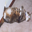

In [64]:
cat_training_data[cat_training_data['id'] == label]['image'][0]

In [66]:
dog_model_result = dog_model.query(cat_test)
dog_id = dog_model_result[0]['reference_label']

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 4.879ms      |

| Done         |         | 100         | 47.985ms     |

+--------------+---------+-------------+--------------+

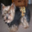

In [68]:
dog_training_data[dog_training_data['id'] == dog_id]['image'][0]

## Try a simple example of nearest-neighbors classification

In [51]:
cat_model_result['distance'].mean()

36.15573070978294

In [52]:
dog_model_result['distance'].mean()

37.77071136184157

## Compute nearest neighbors accuracy

In [53]:
cat_test_data = image_test[image_test['label' == 'cat']]
dog_test_data = image_test[image_test['label'] == 'dog']
automobile_test_data = image_test[image_test['label'] == 'automobile']
bird_test_data = image_test[image_test['label'] == 'bird']

In [54]:
dog_cat_neighbours = cat_model.query(dog_test_data, k=1)
dog_dog_neighbours = dog_model.query(dog_test_data, k=1)
dog_automobile_neighbours = automobile_model.query(dog_test_data, k=1)
dog_bird_neighbours = bird_model.query(dog_test_data, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 248.469ms    |

| Done         | 509000  | 100         | 303.023ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 276.111ms    |

| Done         | 509000  | 100         | 316.266ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 315.236ms    |

| Done         | 509000  | 100         | 363.051ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 199.444ms    |

| Done         | 478000  | 100         | 250.678ms    |

+--------------+---------+-------------+--------------+

In [58]:
dog_distances = turicreate.SFrame()

In [59]:
dog_distances['dog-dog'] = dog_dog_neighbours['distance']
dog_distances['dog-cat'] = dog_cat_neighbours['distance']
dog_distances['dog-automobile'] = dog_automobile_neighbours['distance']
dog_distances['dog-bird'] = dog_bird_neighbours['distance']

In [60]:
def is_dog_correct(row):
  if row['dog-cat'] < row['dog-dog'] or row['dog-automobile'] < row['dog-dog'] or row['dog-bird'] < row['dog-dog']:
    return 0
  else:
    return 1

In [61]:
dog_distances.apply(is_dog_correct).sum() / len(dog_distances)

0.678